# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City not found. Skipping... {e}")
        pass

    # Pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sitka
Processing Record 2 of Set 1 | hawaiian paradise park
Processing Record 3 of Set 1 | mersing
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | lata
Processing Record 6 of Set 1 | hithadhoo
Processing Record 7 of Set 1 | hamilton
Processing Record 8 of Set 1 | torit
Processing Record 9 of Set 1 | kidal
Processing Record 10 of Set 1 | blackmans bay
Processing Record 11 of Set 1 | atar
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | cape canaveral
Processing Record 14 of Set 1 | margaret river
Processing Record 15 of Set 1 | mukalla
Processing Record 16 of Set 1 | usogorsk
Processing Record 17 of Set 1 | vendenheim
Processing Record 18 of Set 1 | west island
Processing Record 19 of Set 1 | luderitz
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1 | san patricio
Processing Record 22 of Set 1 | iqaluit
Processing Recor

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sitka,57.0531,-135.3300,9.64,81,100,1.77,US,1749265262
1,hawaiian paradise park,19.5933,-154.9731,25.57,78,4,0.45,US,1749265263
2,mersing,2.4312,103.8405,28.95,79,20,2.06,MY,1749265264
3,waitangi,-43.9535,-176.5597,11.39,85,95,18.48,NZ,1749265265
4,lata,40.1629,-8.3327,11.38,91,67,1.23,PT,1749265266


In [10]:
import os
print(os.path.exists("output_data/cities.csv"))

True


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sitka,57.0531,-135.3300,9.64,81,100,1.77,US,1749265262
1,hawaiian paradise park,19.5933,-154.9731,25.57,78,4,0.45,US,1749265263
2,mersing,2.4312,103.8405,28.95,79,20,2.06,MY,1749265264
3,waitangi,-43.9535,-176.5597,11.39,85,95,18.48,NZ,1749265265
4,lata,40.1629,-8.3327,11.38,91,67,1.23,PT,1749265266


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

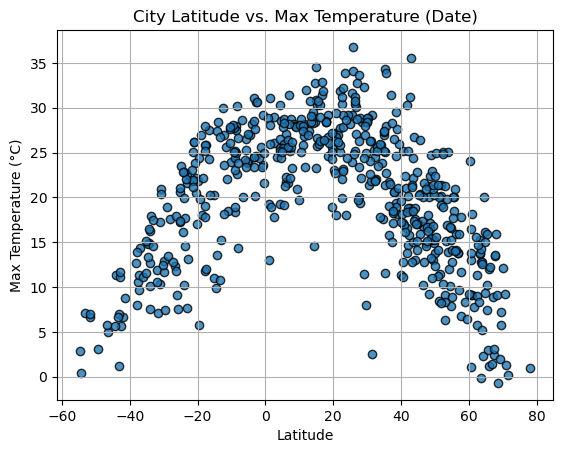

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

In [14]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

<Figure size 640x480 with 0 Axes>

#### Latitude Vs. Cloudiness

In [15]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

<Figure size 640x480 with 0 Axes>

#### Latitude vs. Wind Speed Plot

In [16]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

<Figure size 640x480 with 0 Axes>

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
from scipy.stats import linregress

def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, file_name):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Calculate regression line
    regress_values = slope * x_values + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

    # Plot scatter plot
    plt.scatter(x_values, y_values, edgecolor="black", alpha=0.8)

    # Plot regression line
    plt.plot(x_values, regress_values, "r-", label=line_eq)

    # Add labels and title
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)

    # Save and show plot
    plt.savefig(file_name)
    plt.show()

    print(f"R-squared: {rvalue**2:.3f}")

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sitka,57.0531,-135.3300,9.64,81,100,1.77,US,1749265262
1,hawaiian paradise park,19.5933,-154.9731,25.57,78,4,0.45,US,1749265263
2,mersing,2.4312,103.8405,28.95,79,20,2.06,MY,1749265264
4,lata,40.1629,-8.3327,11.38,91,67,1.23,PT,1749265266
6,hamilton,39.1834,-84.5333,20.52,95,100,3.09,US,1749265268


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,waitangi,-43.9535,-176.5597,11.39,85,95,18.48,NZ,1749265265
5,hithadhoo,-0.6000,73.0833,29.16,68,81,4.55,MV,1749265267
9,blackmans bay,-43.0167,147.3167,11.07,65,20,5.75,AU,1749265271
11,port-aux-francais,-49.3500,70.2167,3.03,62,100,9.19,TF,1749265274
13,margaret river,-33.9500,115.0667,16.24,58,100,0.79,AU,1749265054


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.53


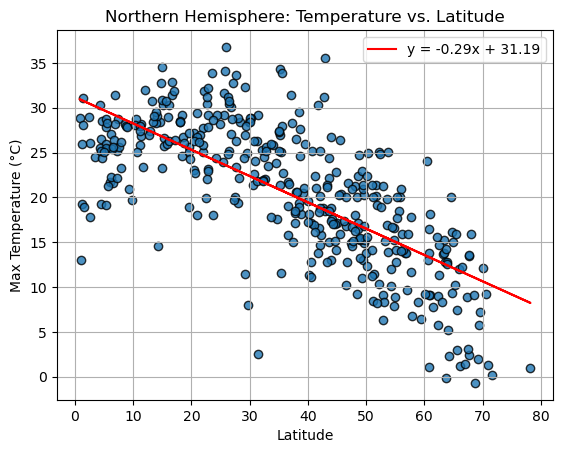

In [22]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression line
regress_values = slope * x_values + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the scatter plot and regression line
plt.scatter(x_values, y_values, edgecolor="black", alpha=0.8)
plt.plot(x_values, regress_values, "r-", label=line_eq)

# Add graph properties
plt.title("Northern Hemisphere: Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.legend()
plt.grid(True)

# Display the r-squared value
print(f"The r^2-value is: {rvalue**2:.2f}")

# Show the plot
plt.show()

The r^2-value is: 0.65


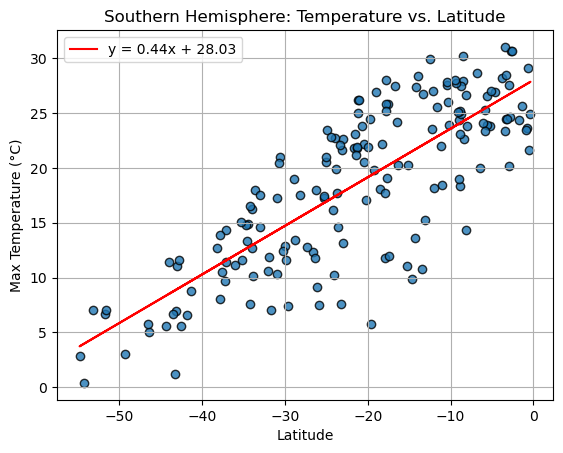

In [23]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression line
regress_values = slope * x_values + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the scatter plot and regression line
plt.scatter(x_values, y_values, edgecolor="black", alpha=0.8)
plt.plot(x_values, regress_values, "r-", label=line_eq)

# Add graph properties
plt.title("Southern Hemisphere: Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.legend()
plt.grid(True)

# Display the r-squared value
print(f"The r^2-value is: {rvalue**2:.2f}")

# Show the plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.00


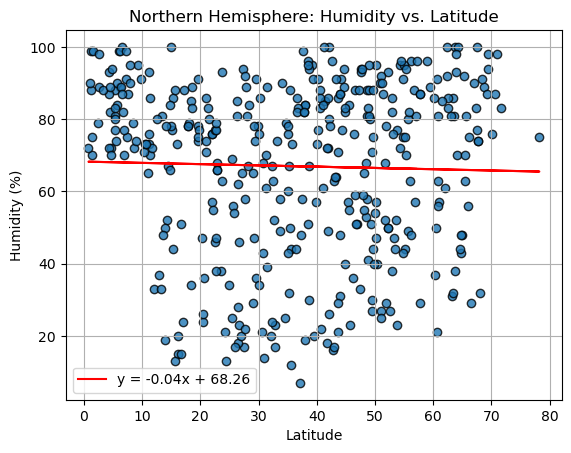

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression line
regress_values = slope * x_values + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the scatter plot and regression line
plt.scatter(x_values, y_values, edgecolor="black", alpha=0.8)
plt.plot(x_values, regress_values, "r-", label=line_eq)

# Add graph properties
plt.title("Northern Hemisphere: Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.legend()
plt.grid(True)

# Display the r-squared value
print(f"The r^2-value is: {rvalue**2:.2f}")

# Show the plot
plt.show()

The r^2-value is: 0.01


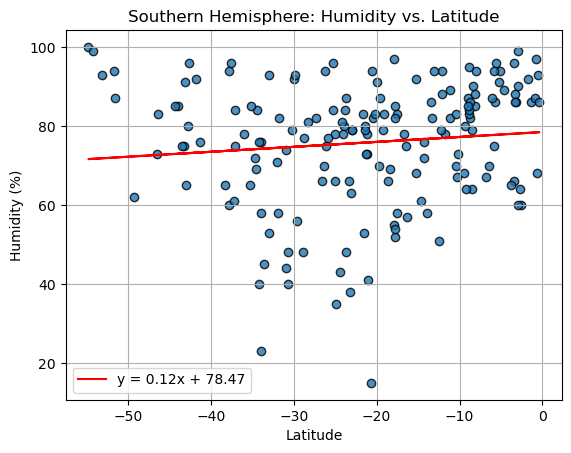

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression line
regress_values = slope * x_values + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the scatter plot and regression line
plt.scatter(x_values, y_values, edgecolor="black", alpha=0.8)
plt.plot(x_values, regress_values, "r-", label=line_eq)

# Add graph properties
plt.title("Southern Hemisphere: Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.legend()
plt.grid(True)

# Display the r-squared value
print(f"The r^2-value is: {rvalue**2:.2f}")

# Show the plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.03


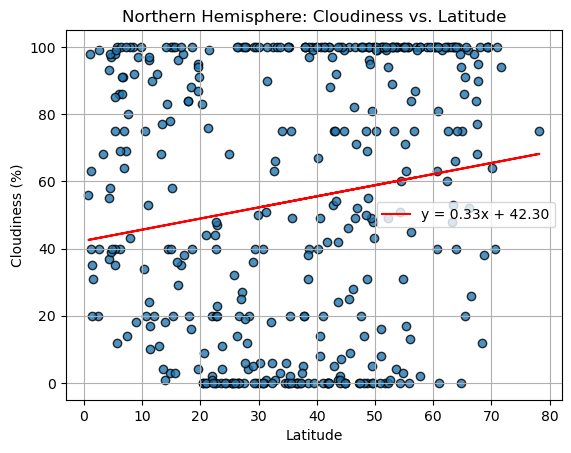

In [26]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression line
regress_values = slope * x_values + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the scatter plot and regression line
plt.scatter(x_values, y_values, edgecolor="black", alpha=0.8)
plt.plot(x_values, regress_values, "r-", label=line_eq)

# Add graph properties
plt.title("Northern Hemisphere: Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.legend()
plt.grid(True)

# Display the r-squared value
print(f"The r^2-value is: {rvalue**2:.2f}")

# Show the plot
plt.show()

The r^2-value is: 0.00


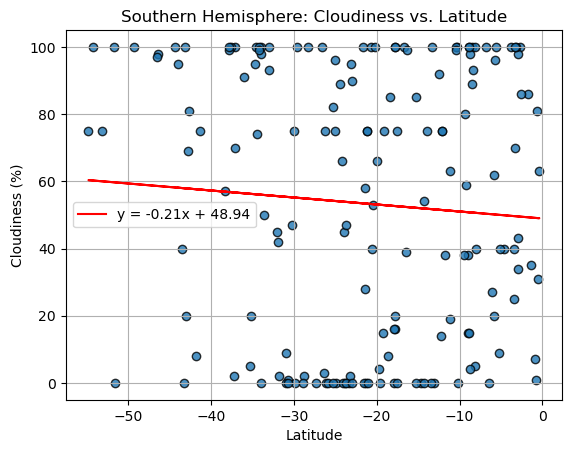

In [27]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression line
regress_values = slope * x_values + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the scatter plot and regression line
plt.scatter(x_values, y_values, edgecolor="black", alpha=0.8)
plt.plot(x_values, regress_values, "r-", label=line_eq)

# Add graph properties
plt.title("Southern Hemisphere: Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.legend()
plt.grid(True)

# Display the r-squared value
print(f"The r^2-value is: {rvalue**2:.2f}")

# Show the plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.00


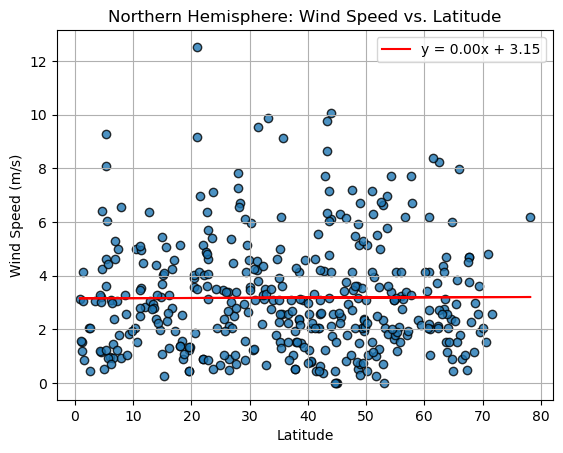

In [32]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression line
regress_values = slope * x_values + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the scatter plot and regression line
plt.scatter(x_values, y_values, edgecolor="black", alpha=0.8)
plt.plot(x_values, regress_values, "r-", label=line_eq)

# Add graph properties
plt.title("Northern Hemisphere: Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.legend()
plt.grid(True)

# Display the r-squared value
print(f"The r^2-value is: {rvalue**2:.2f}")

# Show the plot
plt.show()

The r^2-value is: 0.02


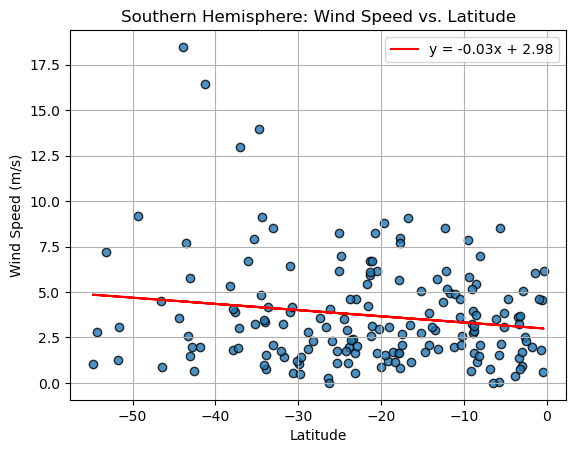

In [33]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression line
regress_values = slope * x_values + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the scatter plot and regression line
plt.scatter(x_values, y_values, edgecolor="black", alpha=0.8)
plt.plot(x_values, regress_values, "r-", label=line_eq)

# Add graph properties
plt.title("Southern Hemisphere: Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.legend()
plt.grid(True)

# Display the r-squared value
print(f"The r^2-value is: {rvalue**2:.2f}")

# Show the plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The biggest correlation I see in the linear regression lies in the Temperature vs Laditude section. .This is highly showcased in how the temerature signficantly drops the higher the Laditude is.
